In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib
import astropy.units as u
import astropy.coordinates as coord
from astroquery.vizier import Vizier
%matplotlib inline
from astropy.io import fits
from astroquery.simbad import Simbad
import matplotlib
import aplpy
from astroquery.sdss import SDSS
from astropy.coordinates import Angle
from array import array
from wcsaxes import SphericalCircle
from astropy.table import Table

/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/sdss/__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


In [4]:
#Region of Sky:

RA=180.0
DE=60.0
RA_length=180.0
DE_length=30.0

#Catalogues:

First_Catalogue_Name='WENSS'
Second_Catalogue_Name='Downes+ 2001-2006'

In [5]:
First_Catalogue_Data= Table.read('data/'+First_Catalogue_Name+'.fit', format='fits')
#print First_Catalogue_Data

Second_Catalogue_Data= Table.read('data/Downes.fit', format='fits')
#print Second_Catalogue_Data

In [7]:
# #First Catalogue:

# #Making array of coords

# RA_First=[]
# for value in First_Catalogue_Data["_RAJ2000"]:
#     RA_First.append(value)
# #print len(RA_First)
# DE_First=[]
# for value in First_Catalogue_Data["_DEJ2000"]:
#     DE_First.append(value)
# #print len(DE_First)

# #Second Catalogue

# #Making array of coords

# RA_Second=[]
# n=0
# while n<len(Second_Catalogue_Data["_RAJ2000"]):
#     if Second_Catalogue_Data['VarType'][n] != "non-CV":
#         RA_Second.append(Second_Catalogue_Data["_RAJ2000"][n])
#     n=n+1
# #print len(RA_Second)

# DE_Second=[]
# n=0
# while n<len(Second_Catalogue_Data["_DEJ2000"]):
#     if Second_Catalogue_Data['VarType'][n] != "non-CV":
#         DE_Second.append(Second_Catalogue_Data["_DEJ2000"][n])
#     n=n+1
# #print len(RA_Second)

In [8]:
# #Getting data from first catalogue

# Vizier.ROW_LIMIT = -1
# First_Catalog_List = Vizier.find_catalogs(First_Catalogue_Name)
# First_Catalogs = Vizier.get_catalogs(First_Catalog_List.keys())
# First_Catalogue_Data=First_Catalogs[0]


# #Getting data from second catalogue

# Second_Catalog_List = Vizier.find_catalogs(Second_Catalogue_Name)
# Second_Catalogs = Vizier.get_catalogs(Second_Catalog_List.keys())
# Second_Catalogue_Data=Second_Catalogs[0]

In [11]:
#First Catalogue:

#Making array of coords
n=0
RA_First=[]
DE_First=[]
Lum_First=[]
RA_First_e=[]
DE_First_e=[]
Lum_First_e=[]
while n< len(First_Catalogue_Data):
    if RA-RA_length<First_Catalogue_Data["_RAJ2000"][n] and First_Catalogue_Data["_RAJ2000"][n]<RA+RA_length and DE-DE_length<First_Catalogue_Data["_DEJ2000"][n] and First_Catalogue_Data["_DEJ2000"][n]<DE+DE_length:
        RA_First.append(First_Catalogue_Data["_RAJ2000"][n])
        DE_First.append(First_Catalogue_Data["_DEJ2000"][n])
    n=n+1
#print len(DE_First)

n=0
RA_Second=[]
DE_Second=[]
Lum_Second=[]
RA_Second_e=[]
DE_Second_e=[]
Lum_Second_e=[]
while n< len(Second_Catalogue_Data):
    if Second_Catalogue_Data['VarType'][n] != "non-CV":
        if RA-RA_length<Second_Catalogue_Data["_RAJ2000"][n] and Second_Catalogue_Data["_RAJ2000"][n]<RA+RA_length and DE-DE_length<Second_Catalogue_Data["_DEJ2000"][n] and Second_Catalogue_Data["_DEJ2000"][n]<DE+DE_length:
            RA_Second.append(Second_Catalogue_Data["_RAJ2000"][n])
            DE_Second.append(Second_Catalogue_Data["_DEJ2000"][n])
    n=n+1
#print len(DE_Second)

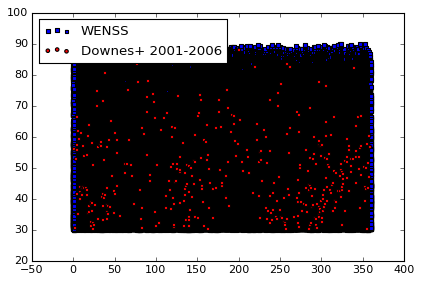

In [12]:
#Plotting coords of two arrays to compare

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(RA_First, DE_First, s=10, c='b', marker="s", label=First_Catalogue_Name)
ax1.scatter(RA_Second,DE_Second, s=10, c='r', marker="o", label=Second_Catalogue_Name)
plt.legend(loc='upper left');
plt.show()

In [13]:
#Finding data for all the stars that overlap

#Set CV error:
Second_e=10.0/3600.0
First_e=2.0/3600.0

RA_First_Relevant=[]
RA_Second_Relevant=[]
DE_First_Relevant=[]
DE_Second_Relevant=[]
f=0
s=0
n=0
corr=0
#While loop goes through all of first catalogue..
while f<len(RA_First):
    #If it compares a source in first catalogue to every source in second without finding one in common then..
    if s>=len(RA_Second):
        #It moves on to next source in first and..
        f=f+1
        #Starts comparing it to the first source in the second catalogue
        s=0
    #This is a formula for overlapping circles with the radii being the error
    #If this is true catalogues have that star in common
    elif First_e+Second_e>= abs(RA_First[f]-RA_Second[s]) and First_e+Second_e>= abs(DE_First[f]-DE_Second[s]):
        #print coords and luminosity
        print corr+1,":"
        print First_Catalogue_Name," Coords: (",RA_First[f],",",DE_First[f],")"
        print Second_Catalogue_Name," Coords: (",RA_Second[s],",",DE_Second[s],")"
        print ""
        #Making arrays of coordinates of sources in common 
        RA_First_Relevant.append(RA_First[s])
        RA_Second_Relevant.append(RA_Second[s])
        DE_First_Relevant.append(DE_First[s])
        DE_Second_Relevant.append(DE_Second[s])
        
        #Move onto next source in first catalogue
        f=f+1
        #Starts comparing it to the first source in the second catalogue
        s=0
        #Number of common sources increased
        corr=corr+1
    #If neither of these are true then..
    else:
        #Try next source in second catalogue
        s=s+1
    #Before going onto next loop increase number of iterations
    n=n+1

1 :
WENSS  Coords: ( 10.421375 , 41.0605833333 )
Downes+ 2001-2006  Coords: ( 10.4205 , 41.0601666667 )

2 :
WENSS  Coords: ( 52.797375 , 43.9035555556 )
Downes+ 2001-2006  Coords: ( 52.8000416667 , 43.9042777778 )

3 :
WENSS  Coords: ( 168.738208333 , 33.8271944444 )
Downes+ 2001-2006  Coords: ( 168.74 , 33.8269444444 )

4 :
WENSS  Coords: ( 267.0245 , 34.06675 )
Downes+ 2001-2006  Coords: ( 267.024291667 , 34.0670833333 )



In [14]:
print "Number of iterations:",n
print "Number of stars corrolated:",corr

Number of iterations: 96578923
Number of stars corrolated: 4


INFO: Auto-setting vmin to -2.633e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.233e+00 [aplpy.core]


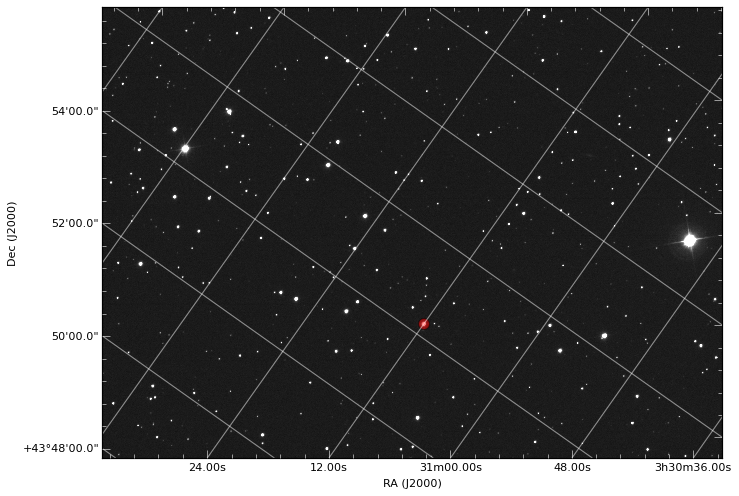

In [20]:
#This finds an image of the star with the biggest fractional change

#Which source to show:
x=1

#Coordinates of this star:
pos=coord.SkyCoord(RA_Second_Relevant[x]*u.deg, DE_Second_Relevant[x]*u.deg)
ra=np.array([RA_Second_Relevant[x]])
de=np.array([DE_Second_Relevant[x]])

#Find image from SDSS:
images = SDSS.get_images(pos)
CV = aplpy.FITSFigure(images[0])

#Gives in grid and makes it grayscale (can also be made colorscale)
CV.show_grayscale()
CV.add_grid()

#This plots a circle where the relevant source should be 
x_pix, y_pix = CV.world2pixel(ra,de)
plt.scatter(x_pix, y_pix, s=100, c='red', alpha=.5)
plt.show()